# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

from sklearn import svm
from sklearn import neighbors, datasets, model_selection, metrics
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [2]:
data = pd.read_csv('airline_delays.csv')
data = data.drop(columns="Unnamed: 0")

# Preprocessing


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52705 entries, 0 to 52704
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DEP_DEL15                      52705 non-null  int64  
 1   DISTANCE_GROUP                 52705 non-null  int64  
 2   DEP_BLOCK                      52705 non-null  object 
 3   SEGMENT_NUMBER                 52705 non-null  int64  
 4   CONCURRENT_FLIGHTS             52705 non-null  int64  
 5   NUMBER_OF_SEATS                52705 non-null  int64  
 6   CARRIER_NAME                   52705 non-null  object 
 7   AIRPORT_FLIGHTS_MONTH          52705 non-null  int64  
 8   AIRLINE_FLIGHTS_MONTH          52705 non-null  int64  
 9   AIRLINE_AIRPORT_FLIGHTS_MONTH  52705 non-null  int64  
 10  AVG_MONTHLY_PASS_AIRPORT       52705 non-null  int64  
 11  AVG_MONTHLY_PASS_AIRLINE       52705 non-null  int64  
 12  FLT_ATTENDANTS_PER_PASS        52705 non-null 

In [5]:
data.nunique()

DEP_DEL15                          2
DISTANCE_GROUP                    11
DEP_BLOCK                          6
SEGMENT_NUMBER                    13
CONCURRENT_FLIGHTS               164
NUMBER_OF_SEATS                   76
CARRIER_NAME                      17
AIRPORT_FLIGHTS_MONTH             82
AIRLINE_FLIGHTS_MONTH             17
AIRLINE_AIRPORT_FLIGHTS_MONTH    509
AVG_MONTHLY_PASS_AIRPORT          83
AVG_MONTHLY_PASS_AIRLINE          17
FLT_ATTENDANTS_PER_PASS           14
GROUND_SERV_PER_PASS              17
PLANE_AGE                         33
DEPARTING_AIRPORT                 83
LATITUDE                          83
LONGITUDE                         83
PREVIOUS_AIRPORT                 324
PRCP                              76
SNOW                              20
SNWD                              12
TMAX                              66
AWND                              81
dtype: int64

In [6]:
data.DISTANCE_GROUP.unique()

array([10,  4,  5,  7,  3,  9, 11,  6,  1,  8,  2], dtype=int64)

In [7]:
data.DEP_BLOCK.unique()

array(['EARLY_MORNING', 'MORNING', 'AFTERNOON', 'LATE_NIGHT', 'MIDDAY',
       'EVENING'], dtype=object)

In [8]:
data.CARRIER_NAME.unique()

array(['American Airlines Inc.', 'Delta Air Lines Inc.',
       'SkyWest Airlines Inc.', 'United Air Lines Inc.',
       'Alaska Airlines Inc.', 'Hawaiian Airlines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.', 'JetBlue Airways',
       'Frontier Airlines Inc.', 'Midwest Airline, Inc.',
       'Endeavor Air Inc.', 'Mesa Airlines Inc.', 'Comair Inc.',
       'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines',
       'Allegiant Air'], dtype=object)

In [9]:
data.DEPARTING_AIRPORT.unique()

array(['Seattle International', 'Pittsburgh International',
       'Cleveland-Hopkins International', 'Kansas City International',
       'Miami International', 'Douglas Municipal',
       'Phoenix Sky Harbor International', 'Philadelphia International',
       'Los Angeles International', 'Tampa International',
       'San Antonio International', 'Dallas Fort Worth Regional',
       "Chicago O'Hare International",
       'Ronald Reagan Washington National',
       'Fort Lauderdale-Hollywood International', 'Orlando International',
       'Nashville International', 'Lambert-St. Louis International',
       'Atlanta Municipal', 'Houston Intercontinental',
       'Bradley International', 'Jacksonville International', 'LaGuardia',
       'Indianapolis Muni/Weir Cook',
       'Louis Armstrong New Orleans International', 'Tulsa International',
       'Raleigh-Durham International', 'John F. Kennedy International',
       'Salt Lake City International', 'Newark Liberty International',
      

In [10]:
data.PREVIOUS_AIRPORT.unique()

array(['NONE', 'San Francisco International', 'San Jose International',
       'San Antonio International', 'Orlando International',
       'Orange County', 'San Diego International Lindbergh Fl',
       'Houston Intercontinental', 'Tucson International',
       'Stapleton International', 'Los Angeles International',
       'Sacramento International', 'Phoenix Sky Harbor International',
       'Fairbanks International', 'Detroit Metro Wayne County',
       'Spokane International', 'McCarran International',
       "Chicago O'Hare International", 'General Mitchell Field',
       'Boise Air Terminal', 'Gallatin Field', 'Mahlon Sweet Field',
       'Roberts Field', 'Washington Dulles International',
       'Portland International', 'Kansas City International',
       'Fresno Air Terminal', 'Salt Lake City International',
       'Reno/Tahoe International', 'Anchorage International',
       'Atlanta Municipal', 'Raleigh-Durham International',
       'John F. Kennedy International',
       'C

In [11]:
data.describe()

,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,5.270500e+04,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000,52705.000000
mean,0.195959,3.954634,2.676501,75.367517,135.919989,12437.043886,60038.852671,3300.278342,308985.619220,1.440597e+06,0.000508,0.000709,11.142112,35.910850,-95.721539,0.176994,0.105201,0.158283,59.231895,9.315581
std,0.396941,2.414312,1.551963,52.504799,47.549494,8406.567252,32930.468634,4015.593150,209483.342847,9.277222e+05,0.000457,0.000263,7.099074,5.792918,18.697865,0.330614,0.465679,0.796721,14.682274,4.222135
min,0.000000,1.000000,1.000000,1.000000,44.000000,1103.000000,7018.000000,1.000000,13584.000000,1.050860e+05,0.000000,0.000033,0.000000,19.739000,-159.346000,0.000000,0.000000,0.000000,5.000000,1.120000
25%,0.000000,2.000000,1.000000,31.000000,90.000000,5019.000000,24691.000000,625.000000,130317.000000,5.350680e+05,0.000170,0.000541,4.000000,32.894000,-112.009000,0.000000,0.000000,0.000000,48.000000,5.820000
50%,0.000000,3.000000,2.000000,66.000000,143.000000,11479.000000,69699.000000,2048.000000,320589.000000,1.539321e+06,0.000338,0.000616,12.000000,36.080000,-87.906000,0.010000,0.000000,0.000000,59.000000,8.950000
75%,0.000000,5.000000,4.000000,106.000000,173.000000,17680.000000,80026.000000,4681.000000,416815.000000,2.338195e+06,0.000768,0.000911,17.000000,39.991000,-80.936000,0.190000,0.000000,0.000000,70.000000,11.860000
max,1.000000,11.000000,13.000000,224.000000,337.000000,32102.000000,107849.000000,19461.000000,816174.000000,2.447530e+06,0.001759,0.001265,32.000000,61.169000,-71.426000,2.020000,6.300000,11.000000,88.000000,25.050000


<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

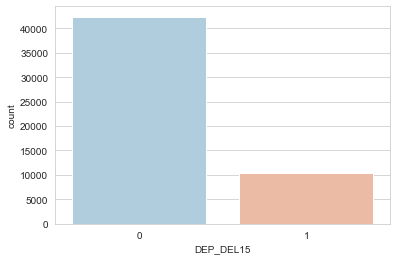

In [12]:
#Apakah data kita imbalance?

sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data,palette='RdBu_r')

## Cleaning

In [13]:
data.head(5)

,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,0,10,EARLY_MORNING,1,7,187,American Airlines Inc.,11493,75591,479,...,7,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
1,0,4,MORNING,1,95,180,Delta Air Lines Inc.,11493,80026,2509,...,0,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
2,0,4,MORNING,1,95,160,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
3,0,5,MORNING,1,95,160,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
4,0,7,MORNING,1,95,132,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92


In [14]:
datagraph=data.drop_duplicates()
datagraph.head(5)

,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,0,10,EARLY_MORNING,1,7,187,American Airlines Inc.,11493,75591,479,...,7,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
1,0,4,MORNING,1,95,180,Delta Air Lines Inc.,11493,80026,2509,...,0,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
2,0,4,MORNING,1,95,160,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
3,0,5,MORNING,1,95,160,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92
4,0,7,MORNING,1,95,132,Delta Air Lines Inc.,11493,80026,2509,...,18,Seattle International,47.447,-122.306,NONE,0.16,0.0,0.0,52.0,4.92


In [15]:
datagraph = datagraph.drop(['AIRLINE_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRLINE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','LATITUDE','LONGITUDE'], axis=1)
datagraph.head(5)

,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,0,10,EARLY_MORNING,1,7,187,American Airlines Inc.,11493,479,344730,7,Seattle International,NONE,0.16,0.0,0.0,52.0,4.92
1,0,4,MORNING,1,95,180,Delta Air Lines Inc.,11493,2509,344730,0,Seattle International,NONE,0.16,0.0,0.0,52.0,4.92
2,0,4,MORNING,1,95,160,Delta Air Lines Inc.,11493,2509,344730,18,Seattle International,NONE,0.16,0.0,0.0,52.0,4.92
3,0,5,MORNING,1,95,160,Delta Air Lines Inc.,11493,2509,344730,18,Seattle International,NONE,0.16,0.0,0.0,52.0,4.92
4,0,7,MORNING,1,95,132,Delta Air Lines Inc.,11493,2509,344730,18,Seattle International,NONE,0.16,0.0,0.0,52.0,4.92


In [16]:
categorical_column = ['DEP_BLOCK','PREVIOUS_AIRPORT','DEPARTING_AIRPORT', 'CARRIER_NAME']
datagraph = pd.get_dummies(datagraph, columns=categorical_column)
datagraph

,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,PRCP,...,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.
0,0,10,1,7,187,11493,479,344730,7,0.16,...,0,0,0,0,0,0,0,0,0,0
1,0,4,1,95,180,11493,2509,344730,0,0.16,...,0,0,0,0,0,0,0,0,0,0
2,0,4,1,95,160,11493,2509,344730,18,0.16,...,0,0,0,0,0,0,0,0,0,0
3,0,5,1,95,160,11493,2509,344730,18,0.16,...,0,0,0,0,0,0,0,0,0,0
4,0,7,1,95,132,11493,2509,344730,18,0.16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52697,0,1,7,7,175,1350,149,35367,7,0.00,...,0,0,0,0,0,0,0,1,0,0
52699,0,1,8,18,123,1350,687,35367,18,0.00,...,0,0,1,0,0,0,0,0,0,0
52701,0,1,10,18,123,1350,687,35367,18,0.00,...,0,0,1,0,0,0,0,0,0,0
52702,0,1,10,7,123,1350,687,35367,21,0.00,...,0,0,1,0,0,0,0,0,0,0


# Training

In [17]:
# data_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# data_target yang khusus hanya akan berisi label/kelas/target 
df_feat = datagraph.drop('DEP_DEL15',axis=1) 
df_feat.head()

,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,PLANE_AGE,PRCP,SNOW,...,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.
0,10,1,7,187,11493,479,344730,7,0.16,0.0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,95,180,11493,2509,344730,0,0.16,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,95,160,11493,2509,344730,18,0.16,0.0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,95,160,11493,2509,344730,18,0.16,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,95,132,11493,2509,344730,18,0.16,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# df_target yang khusus hanya akan berisi label/kelas/target, yaitu apakah positif kanker ganas atau tidak
df_target = datagraph['DEP_DEL15'] 
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: DEP_DEL15, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=0)

In [20]:
y_train.value_counts()

0    29162
1     7234
Name: DEP_DEL15, dtype: int64

In [21]:
oversample = imblearn.over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

1    29162
0    29162
Name: DEP_DEL15, dtype: int64

# Modeling

## XGBoost

In [22]:
abcmodel = AdaBoostClassifier()
abcmodel.fit(X_train, y_train)
y_pred = abcmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.7156227963330982

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     12534
           1       0.31      0.38      0.34      3065

    accuracy                           0.72     15599
   macro avg       0.58      0.59      0.58     15599
weighted avg       0.74      0.72      0.73     15599



In [ ]:
gbcmodel = GradientBoostingClassifier()
gbcmodel.fit(X_train, y_train)
y_pred = gbcmodel.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=1, n_estimators=150)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

## KNN

In [ ]:
knnmodel = neighbors.KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)
y_pred = knnmodel.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

## SVM

In [52]:
svmmodel = SVC(kernel = 'rbf', random_state = 0)
svmmodel.fit(X_train, y_train)
y_pred =svmmodel.predict(X_test)
accuracy_score(y_test,y_pred)

0.47188922366818387

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57     12534
           1       0.21      0.62      0.31      3065

    accuracy                           0.47     15599
   macro avg       0.52      0.53      0.44     15599
weighted avg       0.70      0.47      0.52     15599



## Random Forest

In [24]:
RFmodel = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
accuracy_score(y_test,y_pred)

0.7792166164497725

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     12534
           1       0.43      0.35      0.38      3065

    accuracy                           0.78     15599
   macro avg       0.64      0.62      0.63     15599
weighted avg       0.76      0.78      0.77     15599



## Naive Bayessian

In [26]:
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, y_train)
GNBmodel.get_params()
y_pred = GNBmodel.predict(X_test)
accuracy_score(y_test,y_pred)

0.5505481120584653

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66     12534
           1       0.23      0.57      0.33      3065

    accuracy                           0.55     15599
   macro avg       0.54      0.56      0.50     15599
weighted avg       0.72      0.55      0.60     15599



## Linear Regression

In [28]:
LinRmodel = LinearRegression()
LinRmodel.fit(X_train, y_train)
LinRmodel.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
y_pred = LinRmodel.predict(X_test)
y_pred[y_pred<0.25] = 0
y_pred[y_pred>=0.25] = 1
accuracy_score(y_test,y_pred)

0.6078594781716776

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71     12534
           1       0.28      0.65      0.39      3065

    accuracy                           0.61     15599
   macro avg       0.58      0.62      0.55     15599
weighted avg       0.76      0.61      0.65     15599



## Logistic Regression

In [55]:
LogRModel = LogisticRegression()
LogRModel.fit(X_train, y_train)
LogRModel.get_params()
y_pred = LogRModel.predict_proba(X_test)[:,1]
y_pred[y_pred<0.511] = 0
y_pred[y_pred>=0.511] = 1
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.6123469453170075


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74     12534
           1       0.20      0.33      0.25      3065

    accuracy                           0.61     15599
   macro avg       0.50      0.51      0.49     15599
weighted avg       0.69      0.61      0.64     15599

